In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import pearsonr

import scipy.stats as st

# Préparation des données

## Importation

In [2]:
billets = pd.read_csv('billets.csv', delimiter = ";")
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Pour les besoins de l'anaslyse, je vais dès maintenant remplacer les True et False par 1 (pour True) et 0 (pour False) :

In [3]:
billets.is_genuine = billets.is_genuine.map({True : 1, False : 0})

Je regarde comment se compose mon jeu de données et comment la distribution des données :

In [4]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   int64  
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 82.2 KB


In [5]:
billets.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Je regarde également si mon dataset contient des valeurs manquantes ou des doublons :

In [6]:
billets.isna().sum() #detection des valeurs manquantes

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [7]:
billets.duplicated().sum() #détection des doublons

0

Nous avons effectivement 37 valeurs manquantes pour la variables "margin_low", mais aucun doublon.

## Lien entre les variables 

Je regarde maintenant la corrélation entre mes différentes variables à l'aide d'un paiplot et d'une matrice de corrélation :

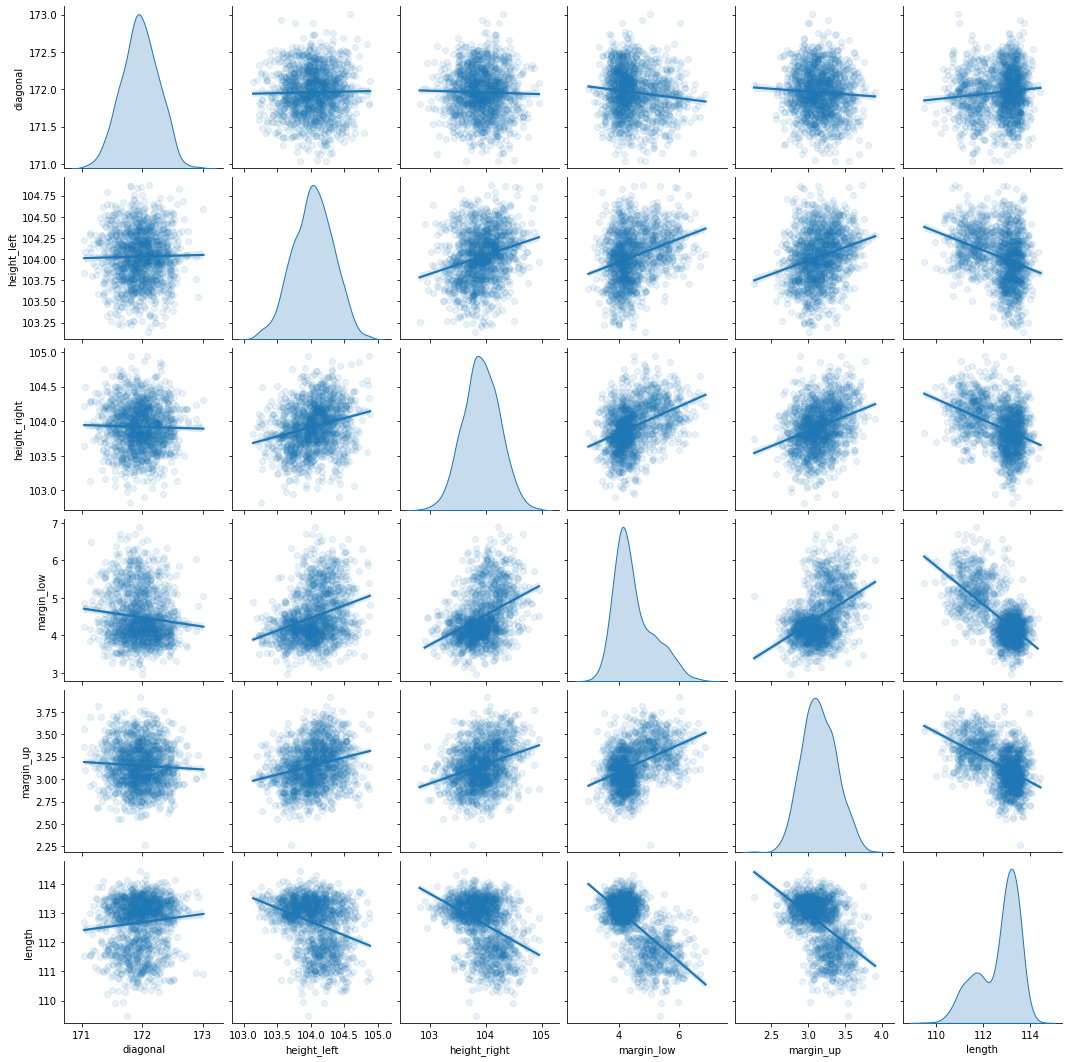

In [8]:
sns.pairplot(billets[['diagonal','height_left','height_right','margin_low','margin_up','length']],
    kind='reg', diag_kind='kde', plot_kws={'scatter_kws': {'alpha': 0.1}})


In [9]:
billets.corr() #création de la matrice de corrélation

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


([<matplotlib.axis.XTick at 0x17d3b3867c0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

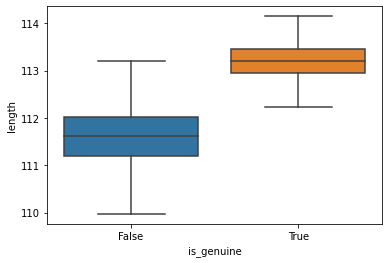

In [10]:
sns.boxplot(data = billets, y = 'length', x ="is_genuine",showfliers = False)
plt.xticks([0,1],['False','True'])

([<matplotlib.axis.XTick at 0x17d3b3ed190>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

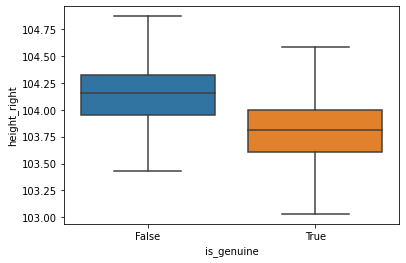

In [11]:
sns.boxplot(data = billets, y = 'height_right', x ="is_genuine",showfliers = False)
plt.xticks([0,1],['False','True'])

([<matplotlib.axis.XTick at 0x17d3b4660d0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

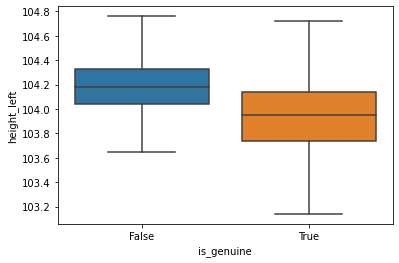

In [12]:
sns.boxplot(data = billets, y = 'height_left', x ="is_genuine",showfliers = False)
plt.xticks([0,1],['False','True'])

([<matplotlib.axis.XTick at 0x17d3b4df4f0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

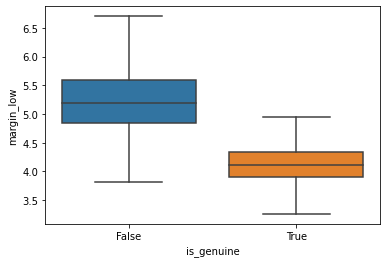

In [13]:
sns.boxplot(data = billets, y = 'margin_low', x ="is_genuine",showfliers = False)
plt.xticks([0,1],['False','True'])

([<matplotlib.axis.XTick at 0x17d3b54fdc0>,
 [Text(0, 0, 'False'), Text(1, 0, 'True')])

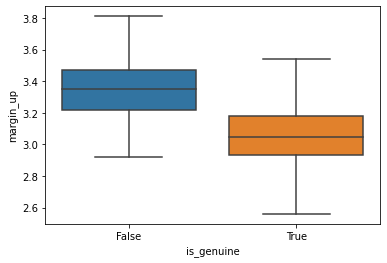

In [14]:
sns.boxplot(data = billets, y = 'margin_up', x ="is_genuine",showfliers = False)
plt.xticks([0,1],['False','True'])

## Normalité des données

Nous commençons par vérifier si nos données sont distribuées selon la loi normale avec un test de Shapiro.

H0 : La distribution de notre variable suit la loi normale

H1 : La distribution de notre variable ne suit pas la loi normale

In [15]:
stat,pvalue = st.shapiro(billets['diagonal'].dropna())
print("Statistique Shapiro = ",stat)
print('P-value = ',pvalue)

Statistique Shapiro =  0.9986858367919922
P-value =  0.323654443025589


In [16]:
stat,pvalue = st.shapiro(billets['height_left'].dropna())
print("Statistique Shapiro = ",stat)
print('P-value = ',pvalue)

Statistique Shapiro =  0.9979056715965271
P-value =  0.051517147570848465


In [17]:
stat,pvalue = st.shapiro(billets['height_right'].dropna())
print("Statistique Shapiro = ",stat)
print('P-value = ',pvalue)

Statistique Shapiro =  0.9995181560516357
P-value =  0.9806451797485352


In [18]:
stat,pvalue = st.shapiro(billets['margin_low'].dropna())
print("Statistique Shapiro = ",stat)
print('P-value = ',pvalue)

Statistique Shapiro =  0.9377838373184204
P-value =  2.828552677965396e-24


In [19]:
stat,pvalue = st.shapiro(billets['margin_up'].dropna())
print("Statistique Shapiro = ",stat)
print('P-value = ',pvalue)

Statistique Shapiro =  0.996167778968811
P-value =  0.000814208120573312


In [20]:
stat,pvalue = st.shapiro(billets['length'].dropna())
print("Statistique Shapiro = ",stat)
print('P-value = ',pvalue)

Statistique Shapiro =  0.9176015853881836
P-value =  7.865591300479774e-28


Lorsque la P-value est inférieure à 0,05, on rejette l'hypothèse nulle, ce qui signifie que la variable ne suit pas la loi normale.

Nous avons donc les variables qui les variables diagonal, height_left et height_right qui suivent la loi normale et les variables margin_up, margin_low et length qui ne suivent pas la loi normale.

## Standardisation des données

Nous allons ici standardiser les données pour les besoins des analyses à venir 

In [21]:
billets_VF = billets['is_genuine'] #Je stocke ma colonne "is_genuine"

In [22]:
billets.drop(columns ='is_genuine', inplace = True ) #Je retire la colonne is_genuine de mon dataset

Je stocke les valeurs, index des billets et noms des features dans des listes tableaux séparés :

In [23]:
X = billets.values
X[:5]

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       [171.36, 103.91, 103.94,   3.62,   3.01, 113.51],
       [171.73, 104.28, 103.46,   4.04,   3.48, 112.54]])

In [24]:
index = billets.index
index

RangeIndex(start=0, stop=1500, step=1)

In [25]:
features = billets.columns
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [27]:
scaler = StandardScaler() #J'instancie mon scaler

In [28]:
scaler.fit(X) #Je l'entraîne avec mes données

StandardScaler()

In [29]:
billets_scaled = scaler.transform(X) #Je transforme mes données avec le scaler entraîné
billets_scaled[:5]

array([[-0.48653957,  2.77412327,  3.16324041,  0.05128623, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.07893701, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12954949, -0.91256208,
         0.55190114],
       [-1.96149786, -0.39929381,  0.06049835, -1.30498166, -0.61049399,
         0.95307539],
       [-0.74875438,  0.83666863, -1.41407214, -0.67205664,  1.41767746,
        -0.15875038]])

In [30]:
billets = pd.DataFrame(billets_scaled, columns = features, index = index) #Je recrée mon dataframe
billets = pd.concat([billets_VF, billets], axis = 1)
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,1,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,1,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,1,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750
...,...,...,...,...,...,...,...
1495,0,-0.683201,1.170713,0.767063,-0.099410,-0.265273,-1.602978
1496,0,0.758981,2.005822,1.596509,1.181509,0.942999,-1.958303
1497,0,-0.519316,-0.065250,0.613462,1.543181,0.899846,-0.835016
1498,0,0.332882,0.836669,0.429141,1.030813,1.331372,-0.491152


Je vérifie que mes données sont bien scalées :

In [31]:
idx = ["mean", "std"]
pd.DataFrame(billets.drop('is_genuine',axis=1)).describe().round(2).loc[idx, :]

,diagonal,height_left,height_right,margin_low,margin_up,length
mean,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


# Régression linéaire pour remplacer les valeurs manquantes

## 1. Préparation du modèle de régression linéaire

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [33]:
billet = billets.dropna() #Je retire les lignes avec des valeurs manquantes

Je stocke la variable cible et les autres variables dans des df séparés : 

In [34]:
list_var=billet.columns.drop(["margin_low","is_genuine"]) #Stocke le nom des variables explicatives
y=billet.margin_low #valeur cible
x=billet[list_var] #valeurs caractéristiques

Je fractionne mon dataset en train/test :

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) #Franctionnement en 80/20

Je peux maintenant créer le modèle, l'entraîner sur les données train, et faire une prédiction sur les données test :

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regLin=LinearRegression() # Création de l'objet regression lineaire

In [38]:
regLin.fit(x_train,y_train) #Entraînement

LinearRegression()

In [39]:
ypred = regLin.predict(x_test) #Prediction sur les datas de test
ypred[:5]

array([ 0.67292817, -0.60190105, -0.38252171,  0.27979065, -0.48301115])

## 2. Test du modèle

Maintenant que le modèle a été entraîné et a pu fournir des prédiction sur l'échantillon test, on va observer la fiabilité de ces prédictions avant de l'utiliser pour estimer nos valeurs manquantes

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

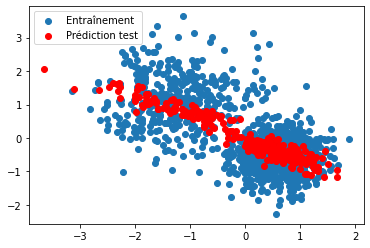

In [41]:
plt.scatter(x_train.length, y_train, label = 'Entraînement')
plt.scatter(x_test.length, ypred, c='r', label = 'Prédiction test')
plt.legend()

In [42]:
# précision du modèle (coefficient de determination R²)
precision = regLin.score(x_test, y_test)
print("R² = ", precision)

R² =  0.4692570450507312


In [43]:
print("MAE = ",mean_absolute_error(y_test, ypred) )

MAE =  0.5835920578846441


In [44]:
print("MSE = ",mean_squared_error(y_test, ypred, squared=True) )

MSE =  0.5723805943744892


In [45]:
print("RMSE = ",mean_squared_error(y_test, ypred, squared=False) )

RMSE =  0.7565583879480084


Nous avons un R² relativement bas, mais ceci peut s'expliquer par la forte dispersion des données. Il en est de même pour la RMSE.

Nous pouvons accéder à plus d'informations concernant notre modèle à l'aide de statsmodel :

In [46]:
X_ols = sm.add_constant(x_train)
model = sm.OLS(y_train,X_ols)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          1.91e-161
Time:                        17:11:19   Log-Likelihood:                -1268.0
No. Observations:                1170   AIC:                             2548.
Df Residuals:                    1164   BIC:                             2578.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0069      0.021     -0.331      0.741      -0.048       0.034
diagonal        -0.0638      0.021     -3.005      0.003      -0.105      -0.022
height_left      0.0808      0.022      3.644      0.000       0.037       0.124
height_right     0.1204      0.023      5.140      0.000       0.074       0.166
margin_up        0.1236      0.025      4.972      0.000       0.075       0.172
length          -0.5150      0.027    -19.285      0.000      -0.567      -0.463
==============================================================================
Omnibus:                       53.970   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.410
Skew:                           0.442   Prob(JB):                     3.11e-16
Kurtosis:                       3.827   Cond. No.                         2.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nous pouvons voir en plus ici que l'ensemble des variables sont significative, nous les concervons donc toutes dans le cadre de cette régression linéaire. 

In [47]:
billet_train = pd.concat([y_train,x_train], axis = 1)
billet_test = pd.concat([y_test,x_test], axis = 1)

In [48]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=billet_test).fit()

### Vérification de la colinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [49]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(3)

,VIF Factor,features
0,1.014,diagonal
1,1.138,height_left
2,1.230,height_right
3,1.404,margin_up
4,1.577,length


Ici, tous les coefficients sont inférieurs à 10, donc, il n'y a pas de problème de colinéarité.

### Test de l’homoscédasticité des résidus

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

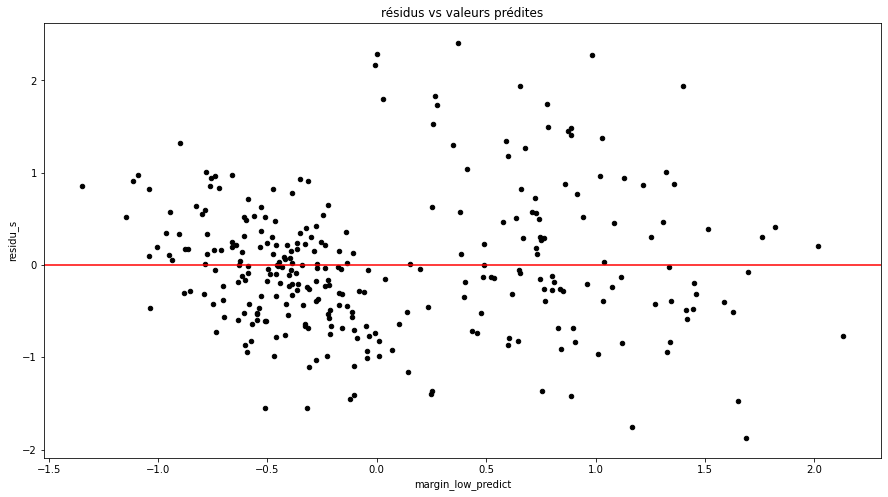

In [53]:
## Vérifions Hypothèse 5 Homoscedasticité**
## Représentons le nuage de points avec les valeurs prédites comme abscisses et lesrésidus comme ordonnées.
billet_test['margin_low_predict'] = reg_multi.predict()
billet_test['residu_s'] = reg_multi.resid
billet_test.plot(kind='scatter', x='margin_low_predict', y="residu_s", figsize=(15, 8), color='black')
plt.title('résidus vs valeurs prédites')
plt.axhline(y=0, color='red')
plt.show()

In [54]:
#Tester l’homoscédasticité
import statsmodels
variables = reg_multi.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.00577651211332303


La p-valeur ici est inférieure à 5%, on rejette l'hypothèse H0 selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

### Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

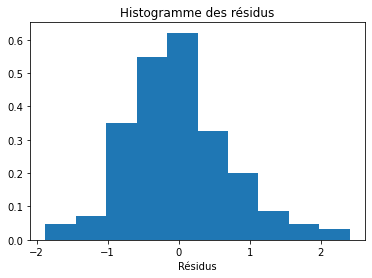

In [56]:
## Vérifions Hypothèse 4: Les résidus doivent être Normaux**
## Représentons l'histogramme des résidus du modèle
plt.hist(billet_test['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

In [57]:
#Tester la normalité des résidus
from scipy.stats import t, shapiro
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9768215417861938, pvalue=0.0001097849672078155)

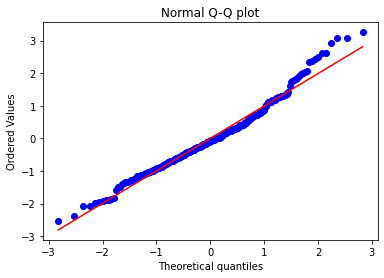

In [59]:
# Représentons le Diagramme Quantile Quantile
import scipy.stats as stats
z = (billet_test['residu_s'] - billet_test['residu_s'].mean())/billet_test['residu_s'].std(ddof=1)
stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

## 3. Prédiction des valeurs manquantes

Le modèle est entraîné et validé, je vais maintenant pouvoir l'utiliser pour prédire les valeurs margin_low manquantes dans notre dataset

Je commence par générer le tableau contenant la prédiction de l'ensemble des valeurs manquantes :

In [60]:
X_predict = billets[list_var] #Je définis les données sur lesquelles le modèle va faire sa prédiction
X_predict[:5]

,diagonal,height_left,height_right,margin_up,length
0,-0.486540,2.774123,3.163240,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,1.417677,-0.158750


In [61]:
id_na = billets[billets.isna().any(axis=1)].index #Je stocke les index des lignes où la valeur margin_low est manquante
id_na

Int64Index([  72,   99,  151,  197,  241,  251,  284,  334,  410,  413,  445,
             481,  505,  611,  654,  675,  710,  739,  742,  780,  798,  844,
             845,  871,  895,  919,  945,  946,  981, 1076, 1121, 1176, 1303,
            1315, 1347, 1435, 1438],
           dtype='int64')

In [62]:
regLin.predict(X_predict)[id_na] #J'applique mon modèle pour prédire spécifiquement les valeurs manquantes

array([-0.22789374, -0.13715597, -0.14077229, -0.14409485,  0.21926431,
       -1.0153175 , -0.43107076, -0.54152293, -0.54497493, -0.48916494,
       -0.48781665, -1.1055306 , -0.65069882, -0.24333548, -0.54813682,
       -0.6487789 , -0.08688076, -0.04194273, -0.20588073, -0.61421673,
       -1.28461713, -0.17818743, -0.61299416, -0.32853432, -0.87989986,
       -1.16297966, -0.3905892 ,  0.35452351, -0.53405869,  0.83975252,
        0.48427134,  0.83237384,  0.76247708,  0.45431713,  1.87543466,
        1.03967865,  0.95828304])

Pour ensuite introduire ces valeurs manquantes à leur place dans le dataset :

In [63]:
billets['margin_low'].loc[billets.isna().any(axis=1)] = regLin.predict(X_predict)[id_na]

C:\Users\barba\AppData\Local\Temp\ipykernel_41176\422727200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billets['margin_low'].loc[billets.isna().any(axis=1)] = regLin.predict(X_predict)[id_na]


In [64]:
billets.isna().sum() #Vérification des valeurs manquantes

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Nous n'avons plus de valeurs manquante dans le dataset, nous pouvons poursuivre l'analyse

# ACP

Je fais ici une ACP afin de comprendre le jeu de données et l'implication des différentes variables dans la variabilité des données et la différenciation vrai/faux billet.

In [65]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

Je prépare les données en retirant les variables qualitatives et en stockant les valeurs, index et noms des features dans des variables séparées : 

In [66]:
billets_ACP = billets.drop(columns = 'is_genuine') #Suppression de is_genuine (qualitative)

In [67]:
X = billets_ACP.values #Stockage des valeurs

In [68]:
index = billets_ACP.index #Stockage des index

In [69]:
features = billets_ACP.columns #Stockage des noms des colonnes

Je vais ensuite entraîner l'ACP et observer la matrice et le cercle de corrélation :

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [71]:
pca = PCA(n_components=5) #J'instancie l'ACP pour composantes

In [72]:
pca.fit(billets_ACP) #Je fit

PCA(n_components=5)

In [73]:
scree = (pca.explained_variance_ratio_*100).round(2) #On regarde le % de variance expliquée par chaque composante
scree_cum = scree.cumsum().round() #On somme ces pourcentages
scree_cum

array([43., 60., 73., 85., 95.])

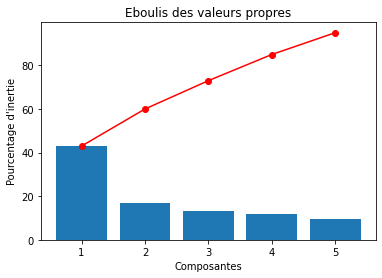

In [74]:
#On génère un graphique représentant les % de variance expliqué par chaque composante
x_list = range(1, 5+1)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Composantes")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.xticks(x_list)
plt.show(block=False)

In [75]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]

<AxesSubplot:>

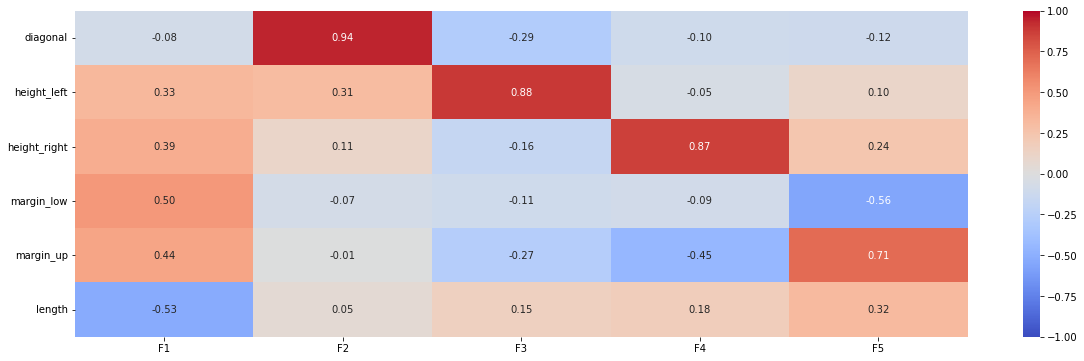

In [76]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

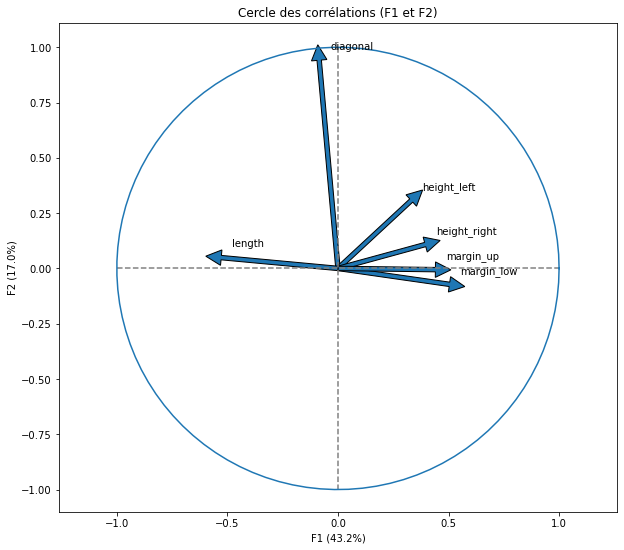

In [77]:
correlation_graph(pca, (0,1), features)

La matrice et le cercle de corrélation montrent que les variables les plus corrélées à la première composante sont les variables length et margin_low, et également margin_up, height_right et height_left.
La variable diagonal n'est elle pas du tout impliquée.

On peut maintenant observer la projection de nos billets sur les axes de l'ACP :

In [78]:
X_proj = pca.transform(billets_ACP) #On transforme notre dataset pour projeter nos billets sur les axes de l'ACP
X_proj[:5]

array([[ 1.64809097,  0.74604894,  2.39879849,  3.18115616,  0.3128827 ],
       [-2.01664878, -2.20705957, -1.00235771,  0.07192381,  0.02760598],
       [-0.97087187,  2.62136184,  1.19905411, -0.92001339, -0.83136877],
       [-1.37037517, -1.81922132,  0.64807638,  0.82618893,  0.7990587 ],
       [ 0.1545868 , -0.5680101 ,  0.85174966, -1.79066128,  1.1695168 ]])

In [79]:
X_proj = pd.DataFrame(X_proj)

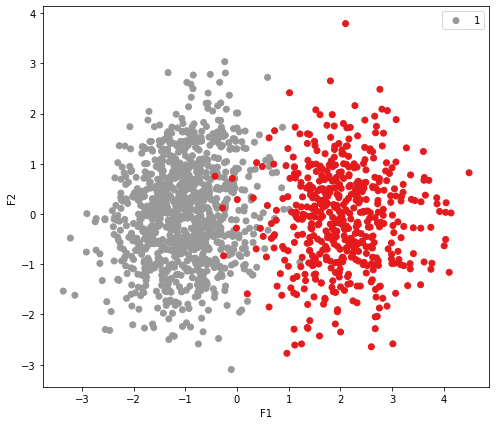

In [80]:
# On définit notre figure et son axe : 
fig, ax = plt.subplots(1,1, figsize=(8,7))

#On projette la transformation des points de notre dataset sur les axes de l'ACP
ax.scatter(X_proj.iloc[:, 0], X_proj.iloc[:, 1], c= billets.is_genuine, cmap="Set1", alpha =1)

# On spécifie les axes x et y :
ax.set_xlabel("F1")
ax.set_ylabel("F2")
plt.legend(billets.is_genuine)
plt.show()

On avait vu précédemment que la variable diagonal n'était pas du tout impliquée dans la premiere composante mais beaucoup dans deuxième composante, or on voit que seule la première composante permet de bien séparer les vrais billets des faux.

# Séparation des données d'entraînement et de test

In [81]:
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,1,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,1,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,1,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750


In [82]:
list_var=billets.columns.drop(["is_genuine","diagonal"]) #Stocke le nom des variables explicatives
y=billets.is_genuine #valeur cible
x=billets[list_var] #valeurs caractéristiques

In [83]:
#fractionner dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [84]:
print("Taille échantillon d'entraînement :", x_train.shape[0])
print("Nombre de faux billets dans les données d'entraînement :", y_train.loc[y_train==0].shape[0])

print("Taille échantillon de test :", x_test.shape[0])
print("Nombre de faux billets dans les données de test :", y_test.loc[y_test==0].shape[0])

Taille échantillon d'entraînement : 1200
Nombre de faux billets dans les données d'entraînement : 403
Taille échantillon de test : 300
Nombre de faux billets dans les données de test : 97


# Régression logistique

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

## Optimisation du modele

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 'penalty' : ['l1', 'l2', 'elasticnet', None]}

grid = GridSearchCV(linear_model.LogisticRegression(),param_grid, cv=5)
grid.fit(x_train, y_train)

C:\Users\barba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
85 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\barba\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\barba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\barba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [88]:
grid.best_score_

0.9883333333333335

In [89]:
grid.best_params_

{'penalty': 'l1', 'solver': 'saga'}

## Test et évaluation du modèle

In [90]:
#instanciation du modèle avec les meilleurs paramètres trouvés précédemment
regLog = linear_model.LogisticRegression(random_state = 0,
                solver = 'saga', penalty = 'l1', multi_class = 'auto')

In [91]:
#training
regLog.fit(x_train,y_train)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [92]:
def evaluation(model) :
    model.fit(x_train, y_train)
    ypred = model.predict(x_test).round()
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [93]:
evaluation(regLog)

[[ 96   1]
 [  1 202]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        97
           1       1.00      1.00      1.00       203

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [94]:
pd.DataFrame(np.concatenate([regLog.intercept_.reshape(-1,1),
                             regLog.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x.columns)).T

,coef
constante,1.989407
height_left,-0.459514
height_right,-0.832130
margin_low,-3.103996
margin_up,-2.035349
length,4.150108


In [95]:
ypred_regLog = regLog.predict(x_test)

In [96]:
matrice_confusion_regLog = pd.DataFrame(confusion_matrix(y_test, ypred_regLog), index = ['Faux attendu','Vrai attendu'],
                      columns = ['Faux modele','Vrai modele'])

In [97]:
#précision du modèle
precision_regLog = regLog.score(x_test,y_test)
print("Accuracy =", precision_regLog)

Accuracy = 0.9933333333333333


In [98]:
sensibilite_regLog = matrice_confusion_regLog['Faux modele']['Faux attendu'] / (matrice_confusion_regLog['Faux modele']['Faux attendu'] + matrice_confusion_regLog['Faux modele']['Vrai attendu'])
print("Sensibilité =",sensibilite_regLog)

Sensibilité = 0.9896907216494846


In [99]:
specificite_regLog = matrice_confusion_regLog['Vrai modele']['Vrai attendu'] / (matrice_confusion_regLog['Vrai modele']['Vrai attendu'] + matrice_confusion_regLog['Vrai modele']['Faux attendu'])
print("Spécificité =",specificite_regLog)

Spécificité = 0.9950738916256158


In [100]:
f1_regLog = f1_score(y_test,ypred_regLog)
print("Score F1 =",f1_regLog)

Score F1 = 0.9950738916256159


In [101]:
matrice_confusion_regLog

,Faux modele,Vrai modele
Faux attendu,96,1
Vrai attendu,1,202


In [102]:
metrique_regLog = pd.DataFrame([[precision_regLog.round(3),sensibilite_regLog.round(3),specificite_regLog.round(3), f1_regLog.round(3)]], columns = ['Accuracy',"Sensibilité","Spécificité","F-score"], index = ["Regression logistique"])
metrique_regLog

,Accuracy,Sensibilité,Spécificité,F-score
Regression logistique,0.993,0.99,0.995,0.995


In [103]:
# on ajoute une colonne pour la constante
x_stat = sm.add_constant(x_train)
# on ajuste le modèle
model = sm.Logit(y_train, x_stat)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.030368
         Iterations 11


In [104]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1194
Method:                           MLE   Df Model:                            5
Date:                Wed, 29 Mar 2023   Pseudo R-squ.:                  0.9524
Time:                        17:16:00   Log-Likelihood:                -36.442
converged:                       True   LL-Null:                       -765.88
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1913      0.387      5.663      0.000       1.433       2.950
height_left     -0.5293      0.371     -1.428      0.153      -1.256       0.197
height_right    -0.9756      0.403     -2.423      0.015      -1.765      -0.186
margin_low      -3.6177      0.617     -5.861      0.000      -4.827      -2.408
margin_up       -2.4555      0.515     -4.770      0.000      -3.465      -1.446
length           4.8259      0.772      6.254      0.000       3.313       6.338
================================================================================

Possibly complete quasi-separation: A fraction 0.48 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

## Optimisation du modèle

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve

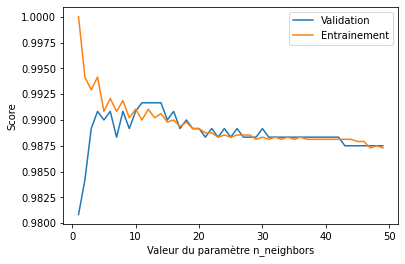

In [107]:
KNN = KNeighborsClassifier()
k = np.arange(1,50)

train_score,val_score = validation_curve(KNN , x_train ,y_train, param_name='n_neighbors', param_range=k, scoring = 'accuracy' , cv = 5)

plt.plot(k,val_score.mean(axis = 1), label= 'Validation')
plt.plot(k,train_score.mean(axis = 1), label = 'Entrainement')

plt.ylabel('Score')
plt.xlabel('Valeur du paramètre n_neighbors')
plt.legend()

On repère les cas d'overfitting lorsque la courbe d'entraînement est au dessus de la courbe de validation. On voit que c'est le cas ici pour des très petite valeur de notre paramètre n_neighbors.

On va donc retenir ici un n_neighbors = 12

In [108]:
cross_val_score(KNeighborsClassifier(12), x_train, y_train, cv=5, scoring = 'accuracy').mean()

0.9916666666666666

## Test et évaluation du modèle

In [109]:
#instanciation du modèle
KNN = KNeighborsClassifier(n_neighbors = 12)

In [110]:
#training
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [111]:
evaluation(KNN)

[[ 95   2]
 [  1 202]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1       0.99      1.00      0.99       203

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [112]:
ypred_KNN = KNN.predict(x_test)

In [113]:
matrice_confusion_KNN = pd.DataFrame(confusion_matrix(y_test, ypred_KNN), index = ['Faux attendu','Vrai attendu'],
                      columns = ['Faux modele','Vrai modele'])

In [114]:
#précision du modèle
precision_KNN = KNN.score(x_test,y_test)
print("Accuracy =", precision_KNN)

Accuracy = 0.99


In [115]:
sensibilite_KNN = matrice_confusion_KNN['Faux modele']['Faux attendu'] / (matrice_confusion_KNN['Faux modele']['Faux attendu'] + matrice_confusion_KNN['Faux modele']['Vrai attendu'])
print("Sensibilité =",sensibilite_KNN)

Sensibilité = 0.9895833333333334


In [116]:
specificite_KNN = matrice_confusion_KNN['Vrai modele']['Vrai attendu'] / (matrice_confusion_KNN['Vrai modele']['Vrai attendu'] + matrice_confusion_KNN['Vrai modele']['Faux attendu'])
print("Spécificité =",specificite_KNN)

Spécificité = 0.9901960784313726


In [117]:
f1_KNN = f1_score(y_test,ypred_KNN)
print("Score F1 =",f1_KNN)

Score F1 = 0.9926289926289927


In [118]:
matrice_confusion_KNN

,Faux modele,Vrai modele
Faux attendu,95,2
Vrai attendu,1,202


In [119]:
metrique_KNN = pd.DataFrame([[precision_KNN.round(3),sensibilite_KNN.round(3),specificite_KNN.round(3), f1_KNN.round(3)]], columns = ['Accuracy',"Sensibilité","Spécificité","F-score"], index = ["KNN"])
metrique_KNN

,Accuracy,Sensibilité,Spécificité,F-score
KNN,0.99,0.99,0.99,0.993


# Kmeans

## Entraînement du modèle

In [120]:
billet_train = pd.concat([x_train, pd.DataFrame(y_train)], axis = 1)

In [131]:
# On instancie notre Kmeans avec 2 clusters : 
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)

# On l'entraine : 
kmeans.fit(x_train)

# On peut stocker nos clusters dans une variable labels : 
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 0, 1, 1])

In [132]:
evaluation(kmeans)

[[ 94   3]
 [  4 199]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        97
           1       0.99      0.98      0.98       203

    accuracy                           0.98       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



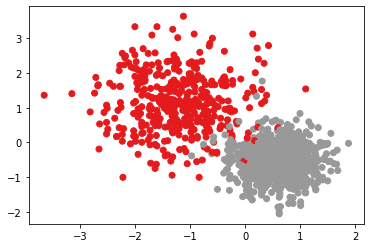

In [133]:
plt.scatter(x_train['length'],x_train['margin_low'], c=labels, cmap="Set1")

In [134]:
ypred_kmeans = kmeans.predict(x_test)

## Test et évaluation du modèle

In [135]:
matrice_confusion_kmeans = pd.DataFrame(confusion_matrix(y_test, ypred_kmeans), index = ['Faux attendu','Vrai attendu'],
                      columns = ['Faux modele','Vrai modele'])

In [136]:
#précision du modèle
precision_kmeans = (matrice_confusion_kmeans['Faux modele']['Faux attendu'] + matrice_confusion_kmeans['Vrai modele']['Vrai attendu']) / matrice_confusion_kmeans.sum().sum()
print("Accuracy =", precision_kmeans)

Accuracy = 0.9766666666666667


In [137]:
sensibilite_kmeans = matrice_confusion_kmeans['Faux modele']['Faux attendu'] / (matrice_confusion_kmeans['Faux modele']['Faux attendu'] + matrice_confusion_kmeans['Faux modele']['Vrai attendu'])
print("Sensibilité =",sensibilite_kmeans)

Sensibilité = 0.9591836734693877


In [138]:
specificite_kmeans = matrice_confusion_kmeans['Vrai modele']['Vrai attendu'] / (matrice_confusion_kmeans['Vrai modele']['Vrai attendu'] + matrice_confusion_kmeans['Vrai modele']['Faux attendu'])
print("Spécificité =",specificite_kmeans)

Spécificité = 0.9851485148514851


In [139]:
f1_kmeans = f1_score(y_test,ypred_kmeans)
print("F1 =",f1_kmeans)

F1 = 0.9827160493827161


In [140]:
matrice_confusion_kmeans

,Faux modele,Vrai modele
Faux attendu,94,3
Vrai attendu,4,199


In [141]:
metrique_kmeans = pd.DataFrame([[precision_kmeans,sensibilite_kmeans.round(3),specificite_kmeans.round(3), f1_kmeans.round(3)]], columns = ['Accuracy',"Sensibilité","Spécificité","F-score"], index = ["KMeans"])
metrique_kmeans

,Accuracy,Sensibilité,Spécificité,F-score
KMeans,0.976667,0.959,0.985,0.983


# Comparaison des modèles

In [142]:
tableau_comparaison = pd.concat([metrique_regLog,metrique_KNN,metrique_kmeans])
tableau_comparaison

,Accuracy,Sensibilité,Spécificité,F-score
Regression logistique,0.993000,0.990,0.995,0.995
KNN,0.990000,0.990,0.990,0.993
KMeans,0.976667,0.959,0.985,0.983


Pour notre problématique de détection de faux billets, il nous sera préférable de s'assurer de bien détecter tous les faux billets au risque de catégoriser de vrais billets comme des faux plutôt que de laisser passer des faux billets en les catégorisement faussement comme des vrais. On veut donc ici avoir la sensibilité la plus élevée possible, on va donc opter plutôt pour notre modèle de régression logistique.

# Détection des faux billets 

In [131]:
billets_test = pd.read_csv('billets_production.csv', delimiter = ",")
billets_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [132]:
id_billets = billets_test.id

In [133]:
names = billets_test.index

In [134]:
billets_test.drop(columns = ['id'], inplace = True)

In [135]:
billets_test_scaled = scaler.transform(billets_test)

C:\Users\barba\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [136]:
features

Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')

In [137]:
billets_test_scaled = pd.DataFrame(billets_test_scaled, columns = features, index = names)

In [138]:
billets_test_scaled.drop(columns = ['diagonal'], inplace = True)

In [139]:
billets_test_scaled

,height_left,height_right,margin_low,margin_up,length
0,-0.065250,-1.168310,1.091092,0.640931,-1.442508
1,0.469220,0.644183,2.281593,0.684084,-0.674546
2,1.838800,1.135706,0.759559,1.029304,-1.270576
3,1.738587,1.289307,-0.069271,-0.524189,0.597750
4,-1.334617,-1.106870,-1.078937,0.036795,0.746757


In [140]:
#Créer df avec résultat vrai/faux
proba = pd.DataFrame({'Probabilité vrai (%)': regLog.predict_proba(billets_test_scaled)[:,1] , 'Probabilité faux (%)': regLog.predict_proba(billets_test_scaled)[:,0]})
#Créer df avec probabilité vrai/faux
vrai_faux = pd.DataFrame({'Vrai ou faux': regLog.predict(billets_test_scaled)})
vrai_faux = vrai_faux['Vrai ou faux'].map({1 : 'Vrai', 0 : 'Faux'})
result = pd.concat([id_billets,billets_test, vrai_faux,proba*100], axis = 1)
result

,id,diagonal,height_left,height_right,margin_low,margin_up,length,Vrai ou faux,Probabilité vrai (%),Probabilité faux (%)
0,A_1,171.76,104.01,103.54,5.21,3.30,111.42,Faux,0.045889,99.954111
1,A_2,171.87,104.17,104.13,6.00,3.31,112.09,Faux,0.004379,99.995621
2,A_3,172.00,104.58,104.29,4.99,3.39,111.57,Faux,0.007290,99.992710
3,A_4,172.49,104.55,104.34,4.44,3.03,113.20,Vrai,97.977257,2.022743
4,A_5,171.65,103.63,103.56,3.77,3.16,113.33,Vrai,99.994968,0.005032
